## Recognizing Fake News in Dataset

In [8]:
import sys


In [9]:
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
# set plot options
plt.rcParams['figure.figsize'] = (12, 8)
default_plot_color = '#00bfbf'

In [11]:
data = pd.read_csv('fake_news_data.csv')

In [12]:
data.head()

,title,text,date,fake_or_factual
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            198 non-null    object
 1   text             198 non-null    object
 2   date             198 non-null    object
 3   fake_or_factual  198 non-null    object
dtypes: object(4)
memory usage: 6.3+ KB


Text(0.5, 0, 'Classification')

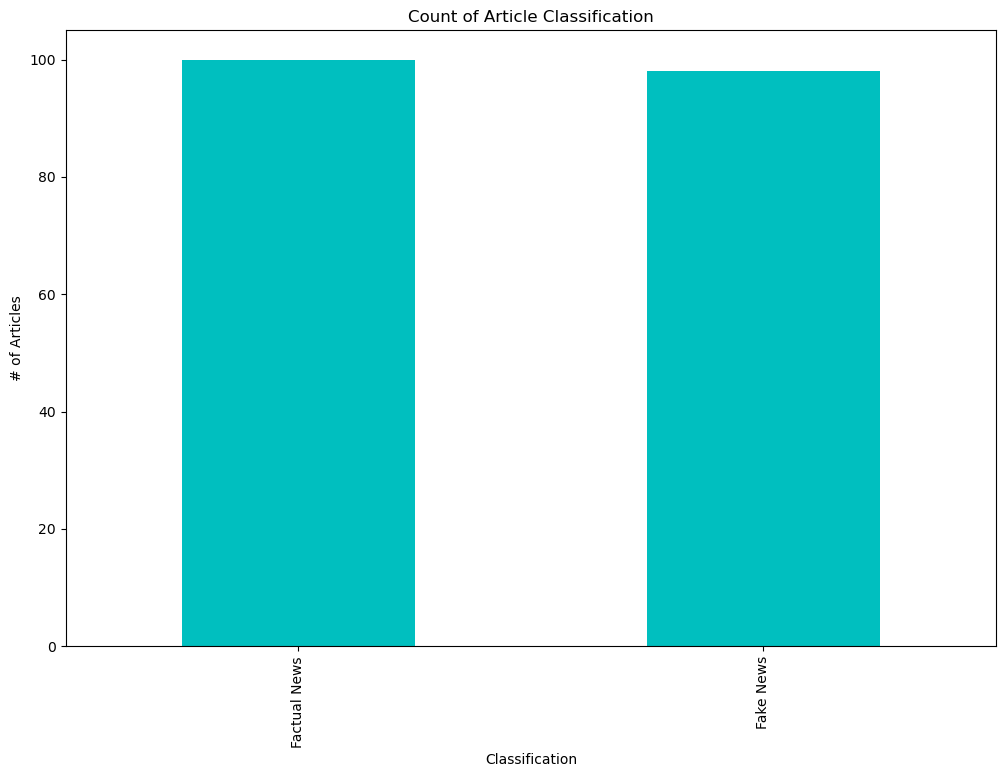

In [14]:
# ensure we have appropriate number of rows in each group visually
data['fake_or_factual'].value_counts().plot(kind='bar', color=default_plot_color)
plt.title('Count of Article Classification')
plt.ylabel('# of Articles')
plt.xlabel('Classification')

In [15]:
# ensure we have appropriate number of rows in each group by comparing numbers

data['fake_or_factual'].value_counts()

fake_or_factual
Factual News    100
Fake News        98
Name: count, dtype: int64

## Import packages required for processing and analysis


In [8]:
!pip install seaborn


In [9]:
!pip install gensim


  Using cached gensim-4.3.3.tar.gz (23.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... /^C
anceled
ERROR: Operation cancelled by user


In [16]:
import seaborn as sns
import spacy
from spacy import displacy
from spacy import tokenizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LsiModel, TfidfModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

## POS Tagging

In [17]:
print(gensim.__version__)


4.3.3


In [18]:
import gensim
print(gensim.__version__)



4.3.3


In [10]:
pip install vaderSentiment


  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata (572 bytes)
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/Users/moe/miniconda3/envs/nlp310/lib/python3.10/site-packages/certifi-2025.7.14.dist-info/METADATA'

Note: you may need to restart the kernel to use updated packages.


In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
print(analyzer.polarity_scores("I love this!"))


{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}


In [20]:
print(gensim.__version__)


4.3.3


In [15]:
nlp = spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [16]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.4 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [17]:
nlp = spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [18]:
import spacy
nlp = spacy.load("en_core_web_sm")


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [21]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.9 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [23]:
import spacy


In [21]:
nlp = spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [22]:
!python -m spacy link en_core_web_sm en_core_web_sm


⚠ As of spaCy v3.0, model symlinks are not supported anymore. You can
load trained pipeline packages using their full names or from a directory
path.


In [23]:
import en_core_web_sm

ModuleNotFoundError: No module named 'en_core_web_sm'

In [24]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.4 MB/s eta 0:00:00a 0:00:01


In [25]:
import en_core_web_sm


ModuleNotFoundError: No module named 'en_core_web_sm'

In [1]:
import spacy



In [2]:
nlp = spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [24]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.0 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [25]:
!python -m spacy validate


✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.8.7) =================
ℹ spaCy installation:
/Users/moe/miniconda3/lib/python3.13/site-packages/spacy

NAME             SPACY            VERSION                            
en_core_web_sm   >=3.8.0,<3.9.0   3.8.0   ✔



In [26]:
!python -m spacy download en_core_web_sm


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
import spacy


In [7]:
nlp = spacy.load("en_core_web_sm")


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [27]:
!{sys.executable} -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.9 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [28]:
!{sys.executable} -m spacy download en_core_web_sm


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [29]:
import spacy


## POS Tagging

In [30]:

nlp = spacy.load("en_core_web_sm")


In [31]:
print(nlp.pipe_names)


['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [32]:
# Split dataset into fake and factual news to compare POS tags

fake_news = data[data['fake_or_factual'] == 'Fake News']
fact_news = data[data['fake_or_factual'] == 'Factual News']


In [33]:
fake_spacydocs = list(nlp.pipe(fake_news['text']))
fact_spacydocs = list(nlp.pipe(fact_news['text']))


In [34]:
fake_spacydocs

[There are two small problems with your analogy Susan  Jesus was NOT a Muslim and Joseph traveled to Bethlehem with Mary. For anyone who s not paying attention there don t appear to be many female refugees accompanying male Muslim  refugees  to Greece.Susan Sarandon spent the Christmas holiday on the Greek island of Lesbos assisting international organizations with the mounting Syrian refugee crisis   a crisis, she says, that recalls the travails of Joseph and Mary on their way to the Inn in Bethlehem.In a column for the Huffington Post and RYOT, the 69-year-old Oscar-winning actress described meeting a 16-year-old girl who had apparently given birth shortly before arriving on the island. I smile and approach her, but without a translator, our conversation is basic-friendly,  Sarandon wrote of her experience.  She takes the bundle next to her and opens it to me. Inside is a perfect, rosy, newborn. The actress continues:She is beaming, so proud. How did this young girl, just having give

In [35]:
# function to extract the tags for each of the documents in our data to each of the rows of our dataframe

def extract_token_tags(doc:spacy.tokens.doc.Doc):
    return[(i.text, i.ent_type_, i.pos_) for i in doc]

In [36]:
# tagging dataset

fake_tagsdf = []
columns = ['token', 'ner_tag', 'pos_tag']

In [37]:
for ix, doc in enumerate(fake_spacydocs):
    tags = extract_token_tags(doc)
    tags = pd.DataFrame(tags)
    tags.columns = columns
    fake_tagsdf.append(tags)

In [38]:
fake_tagsdf = pd.concat(fake_tagsdf)

In [39]:
fact_tagsdf = []

for ix, doc in enumerate(fact_spacydocs):
    tags = extract_token_tags(doc)
    tags = pd.DataFrame(tags)
    tags.columns = columns
    fact_tagsdf.append(tags)

In [40]:
fact_tagsdf = pd.concat(fact_tagsdf)

In [41]:
fake_tagsdf.head()

,token,ner_tag,pos_tag
0,There,,PRON
1,are,,VERB
2,two,CARDINAL,NUM
3,small,,ADJ
4,problems,,NOUN


In [42]:
fact_tagsdf.head()

,token,ner_tag,pos_tag
0,WASHINGTON,GPE,PROPN
1,(,,PUNCT
2,Reuters,ORG,PROPN
3,),,PUNCT
4,-,,PUNCT


In [43]:
# Token frequency count
pos_counts_fake = fake_tagsdf.groupby(['token', 'pos_tag']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
pos_counts_fake.head(10)

,token,pos_tag,counts
28,",",PUNCT,1908
7446,the,DET,1834
39,.,PUNCT,1531
5759,of,ADP,922
2661,and,CCONJ,875
2446,a,DET,804
0,,SPACE,795
7523,to,PART,767
4915,in,ADP,667
5094,is,AUX,419


In [44]:
pos_counts_fact = fact_tagsdf.groupby(['token', 'pos_tag']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
pos_counts_fact.head(10)

,token,pos_tag,counts
6169,the,DET,1903
15,",",PUNCT,1698
22,.,PUNCT,1381
4733,of,ADP,884
1905,a,DET,789
2100,and,CCONJ,757
4015,in,ADP,672
6230,to,PART,660
4761,on,ADP,482
5586,said,VERB,452


In [45]:
## Frequency of individual POS tags (how many nouns, adj...etc)

pos_counts_fact

,token,pos_tag,counts
6169,the,DET,1903
15,",",PUNCT,1698
22,.,PUNCT,1381
4733,of,ADP,884
1905,a,DET,789
...,...,...,...
2061,allegedly,ADV,1
2064,alliances,NOUN,1
2073,alone,ADV,1
2075,along,ADV,1


In [46]:
pos_counts_fake.groupby('pos_tag')['token'].count().sort_values(ascending=False).head(10)

pos_tag
NOUN     2597
VERB     1814
PROPN    1657
ADJ       876
ADV       412
NUM       221
PRON       99
ADP        88
AUX        58
SCONJ      54
Name: token, dtype: int64

In [47]:
pos_counts_fact.groupby('pos_tag')['token'].count().sort_values(ascending=False).head(10)

pos_tag
NOUN     2182
VERB     1535
PROPN    1387
ADJ       753
ADV       271
NUM       203
PRON       81
ADP        70
AUX        44
SCONJ      39
Name: token, dtype: int64

In [48]:
# Both datasets show similar POS patterns—nouns, verbs, and proper nouns are most common—but the specific nouns used may still differ.


In [49]:
pos_counts_fake[pos_counts_fake.pos_tag == 'NOUN'][:15]

,token,pos_tag,counts
5969,people,NOUN,77
7959,women,NOUN,55
6204,president,NOUN,53
7511,time,NOUN,52
3134,campaign,NOUN,44
8011,year,NOUN,44
4577,government,NOUN,41
8013,years,NOUN,40
7344,t,NOUN,40
5208,law,NOUN,40


In [50]:
pos_counts_fact[pos_counts_fact.pos_tag == 'NOUN'][:15]

,token,pos_tag,counts
3748,government,NOUN,71
6639,year,NOUN,64
5927,state,NOUN,58
2373,bill,NOUN,55
1982,administration,NOUN,51
3289,election,NOUN,48
5084,president,NOUN,47
4937,people,NOUN,45
4804,order,NOUN,45
4271,law,NOUN,42


## Named Entities

In [51]:
top_entities_fake = fake_tagsdf[fake_tagsdf['ner_tag'] != ""].groupby(['token', 'ner_tag']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [52]:
top_entities_fact = fact_tagsdf[fact_tagsdf['ner_tag'] != ""].groupby(['token', 'ner_tag']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [53]:
top_entities_fake

,token,ner_tag,counts
1723,Trump,ORG,227
578,Clinton,PERSON,118
2097,the,ORG,113
1724,Trump,PERSON,91
697,Donald,PERSON,74
...,...,...,...
16,",",EVENT,1
59,"120,000",CARDINAL,1
60,1235,DATE,1
61,13,CARDINAL,1


In [54]:
top_entities_fact

,token,ner_tag,counts
1624,Trump,ORG,195
1986,the,ORG,154
1645,U.S.,GPE,138
1383,Reuters,ORG,131
880,House,ORG,68
...,...,...,...
28,"1,000",CARDINAL,1
29,"1,000",MONEY,1
30,"1,300",CARDINAL,1
31,"1,600",CARDINAL,1


In [55]:
import seaborn as sns

In [56]:
ner_palette = {
    'ORG': sns.color_palette('Set2').as_hex()[0],
    'GPE': sns.color_palette('Set2').as_hex()[1],
    'NORP': sns.color_palette('Set2').as_hex()[2],
    'PERSON': sns.color_palette('Set2').as_hex()[3],
    'DATE': sns.color_palette('Set2').as_hex()[4],
    'CARDINAL': sns.color_palette('Set2').as_hex()[5],
    'PERCENT': sns.color_palette('Set2').as_hex()[6],
}

[Text(0.5, 1.0, 'Most Common Named Entities in Fake News')]

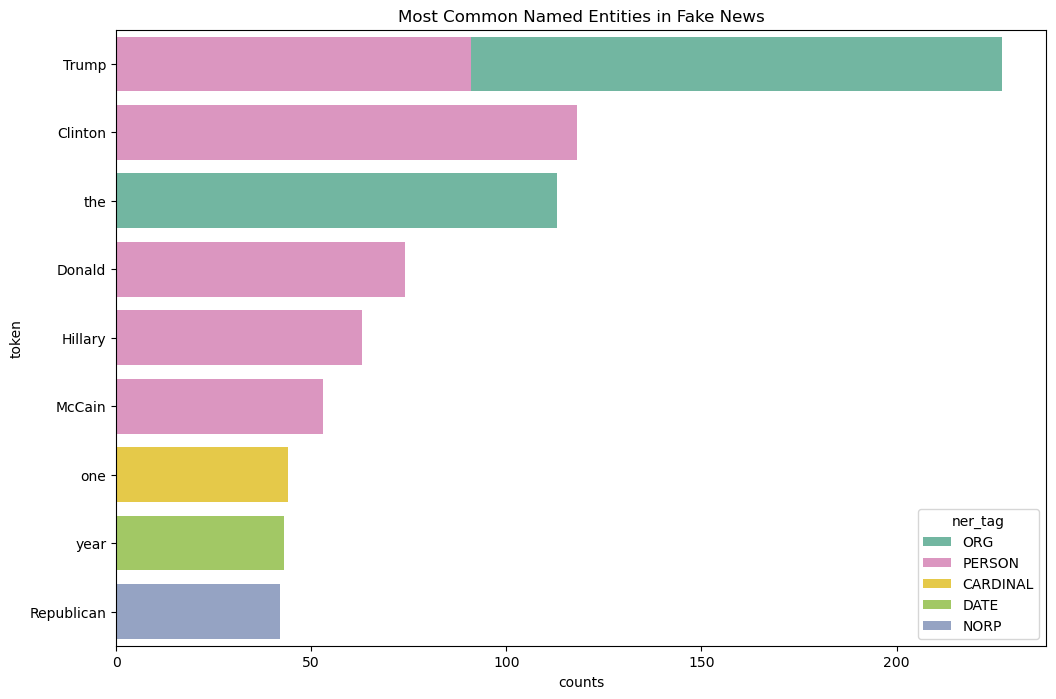

In [57]:
sns.barplot(
    x = 'counts', 
    y = 'token', 
    hue = 'ner_tag', 
    palette = ner_palette, 
    data = top_entities_fake[:10],
    orient = 'h',
    dodge = False
).set(title="Most Common Named Entities in Fake News")

[Text(0.5, 1.0, 'Most Common Named Entities in Factual News')]

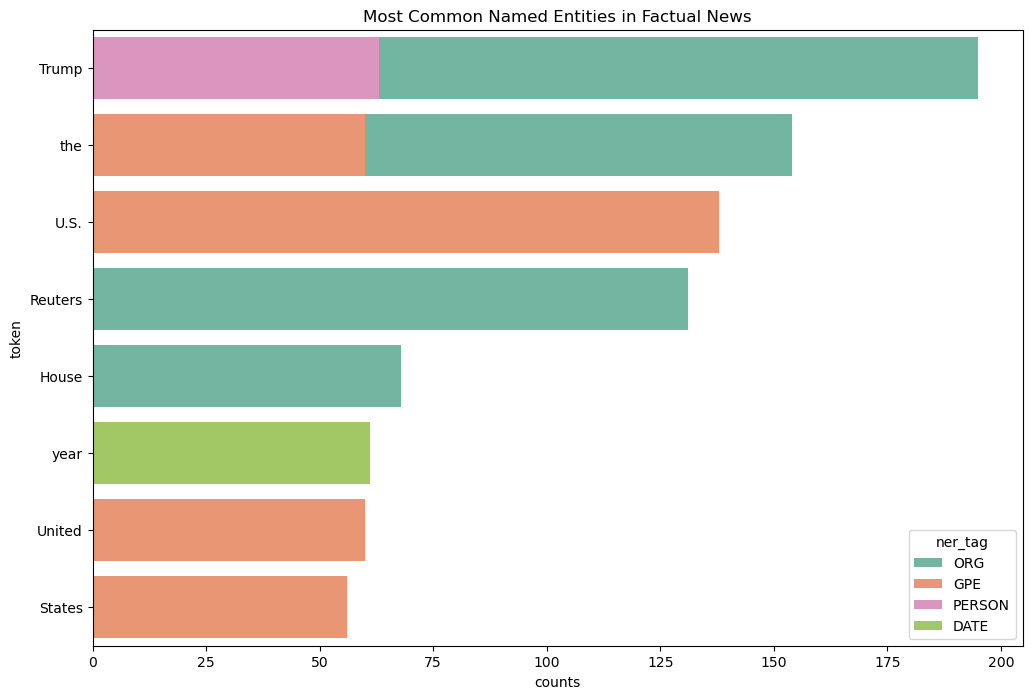

In [58]:
sns.barplot(
    x = 'counts', 
    y = 'token', 
    hue = 'ner_tag', 
    palette = ner_palette, 
    data = top_entities_fact[:10],
    orient = 'h',
    dodge = False
).set(title="Most Common Named Entities in Factual News")

## Text Pre-Processing

In [59]:
data.head()

,title,text,date,fake_or_factual
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News


In [60]:
import re

In [61]:
# remove everything before the dash in text column ex: WASHINGTON (Reuters) - and BELFAST (Reuters) -
data['text_clean'] = data.apply(lambda x: re.sub(r"^[^-]*-\s*", "", x['text']), axis=1)

In [62]:
data.head()

,title,text,date,fake_or_factual,text_clean
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,year-old Oscar-winning actress described meeti...
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,Buried in Trump s bonkers interview with New Y...
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"Women make up over 50 percent of this country,..."
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,U.S. Defense Secretary Jim Mattis said on Mond...
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,Northern Ireland s political parties are rapid...


In [63]:
data['text_clean'] = data['text_clean'].str.lower()

In [64]:
data.head()

,title,text,date,fake_or_factual,text_clean
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,year-old oscar-winning actress described meeti...
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,buried in trump s bonkers interview with new y...
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"women make up over 50 percent of this country,..."
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,u.s. defense secretary jim mattis said on mond...
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,northern ireland s political parties are rapid...


In [65]:
# removes punctuation
data['text_clean'] = data.apply(lambda x: re.sub(r"([^\w\s])", "", x['text_clean']), axis=1)

In [66]:
from nltk.corpus import stopwords


In [67]:
# stopwords
en_stopwords = stopwords.words('english')
print(en_stopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [68]:
# It is important to make sure that the tokens in pos_counts_fact and pos_counts_fake are included in en_stopwords

In [69]:
# remove stopwords 
data['text_clean'] = data['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))

In [70]:
data.head()

,title,text,date,fake_or_factual,text_clean
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,yearold oscarwinning actress described meeting...
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,buried trump bonkers interview new york times ...
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,women make 50 percent country grossly underrep...
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,us defense secretary jim mattis said monday ru...
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,northern ireland political parties rapidly run...


In [71]:
from nltk.tokenize import word_tokenize


In [72]:
data['text_clean'] = data.apply(lambda x: word_tokenize(x['text_clean']), axis=1)


In [73]:
# Lemmatize
lemmatize = WordNetLemmatizer()
data['text_clean'] = data['text_clean'].apply(lambda tokens: [lemmatize.lemmatize(token) for token in tokens])

In [74]:
data.head()

,title,text,date,fake_or_factual,text_clean
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,"[yearold, oscarwinning, actress, described, me..."
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,"[buried, trump, bonkers, interview, new, york,..."
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"[woman, make, 50, percent, country, grossly, u..."
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,"[u, defense, secretary, jim, mattis, said, mon..."
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,"[northern, ireland, political, party, rapidly,..."


In [75]:
# check most common ingrams

tokens_clean = sum(data['text_clean'], [])

In [83]:
unigrams = (pd.Series(nltk.ngrams(tokens_clean, 1)).value_counts()).reset_index()[:10]
print(unigrams[:10])

           index  count
0        (said,)    560
1       (trump,)    520
2           (u,)    255
3       (state,)    250
4   (president,)    226
5       (would,)    210
6         (one,)    141
7  (republican,)    128
8        (year,)    128
9        (also,)    124


/var/folders/kh/lpp45f9x2tl4dnfssb8yd5c40000gn/T/ipykernel_59908/1940463071.py:5: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='count',


[Text(0.5, 1.0, 'Most Common Unigram After Preprocessing')]

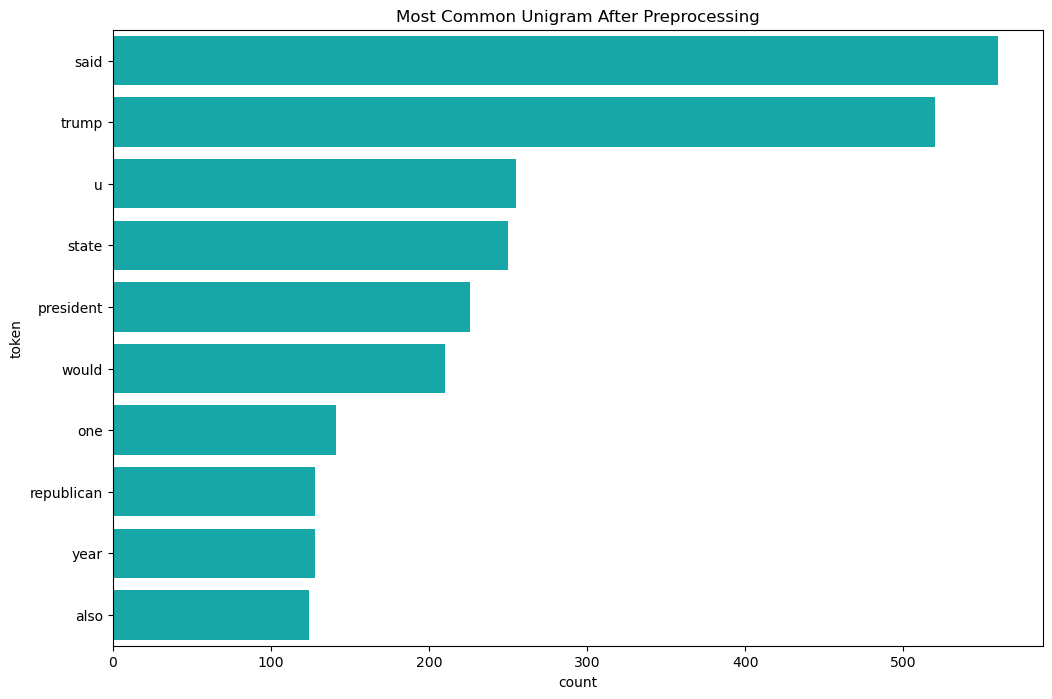

In [88]:
# turn unigrams into a plot

unigrams['token'] = unigrams['index'].apply(lambda x: x[0])
    
sns.barplot(x='count', 
            y='token',
            data=unigrams,
            orient='h',
            palette=[default_plot_color],
            hue='token', 
            legend=False).set(title='Most Common Unigram After Preprocessing')
    

In [89]:
bigrams = (pd.Series(nltk.ngrams(tokens_clean, 2)).value_counts()).reset_index()[:10]
print(bigrams[:10])



                     index  count
0          (donald, trump)     92
1          (united, state)     80
2           (white, house)     72
3      (president, donald)     42
4       (hillary, clinton)     31
5              (new, york)     31
6         (supreme, court)     29
7             (image, via)     29
8         (official, said)     26
9  (trump, administration)     24


/var/folders/kh/lpp45f9x2tl4dnfssb8yd5c40000gn/T/ipykernel_59908/2511359612.py:3: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='count',


[Text(0.5, 1.0, 'Most Common Bigrams After Preprocessing')]

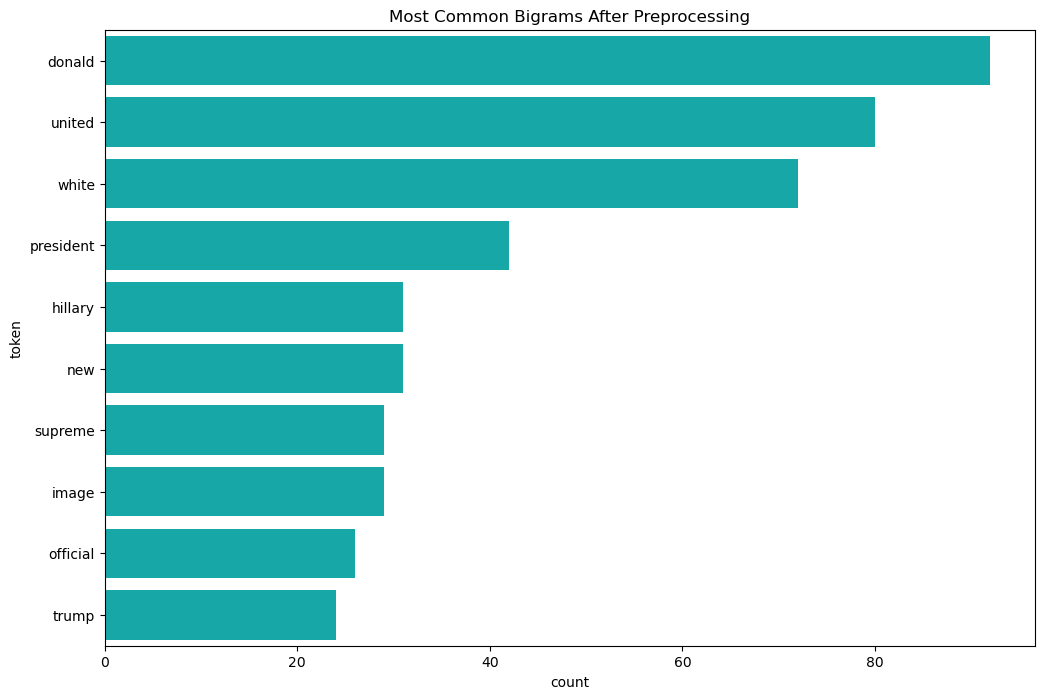

In [92]:
bigrams['token'] = bigrams['index'].apply(lambda x: x[0])

sns.barplot(x='count', 
            y='token',
            data=bigrams,
            orient='h',
            palette=[default_plot_color],
            hue='token', 
            legend=False).set(title='Most Common Bigrams After Preprocessing')


## Sentiment Analysis

In [93]:
# Do sentiments differ between Factual and Fake news types?

In [94]:
vader_sentiment = SentimentIntensityAnalyzer()

In [95]:
# create column for sentiment score
data['vader_sentiment_score'] = data['text'].apply(lambda x: vader_sentiment.polarity_scores(x)['compound'])

In [96]:
data.head()

,title,text,date,fake_or_factual,text_clean,vader_sentiment_score
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,"[yearold, oscarwinning, actress, described, me...",-0.3660
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,"[buried, trump, bonkers, interview, new, york,...",-0.8197
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"[woman, make, 50, percent, country, grossly, u...",0.9779
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,"[u, defense, secretary, jim, mattis, said, mon...",-0.3400
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,"[northern, ireland, political, party, rapidly,...",0.8590


In [97]:
# Classify this into positive, negative and neutral sentiment
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']


In [98]:
data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'], bins, labels=names)

In [99]:
data.head()

,title,text,date,fake_or_factual,text_clean,vader_sentiment_score,vader_sentiment_label
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,"[yearold, oscarwinning, actress, described, me...",-0.3660,negative
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,"[buried, trump, bonkers, interview, new, york,...",-0.8197,negative
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"[woman, make, 50, percent, country, grossly, u...",0.9779,positive
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,"[u, defense, secretary, jim, mattis, said, mon...",-0.3400,negative
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,"[northern, ireland, political, party, rapidly,...",0.8590,positive


In [100]:
# Based on the above, determine whether sentiments differ between the 2 types of news articles Factual v Fake
# start by creating a bar chart of the different labels of each of the data

<Axes: xlabel='vader_sentiment_label'>

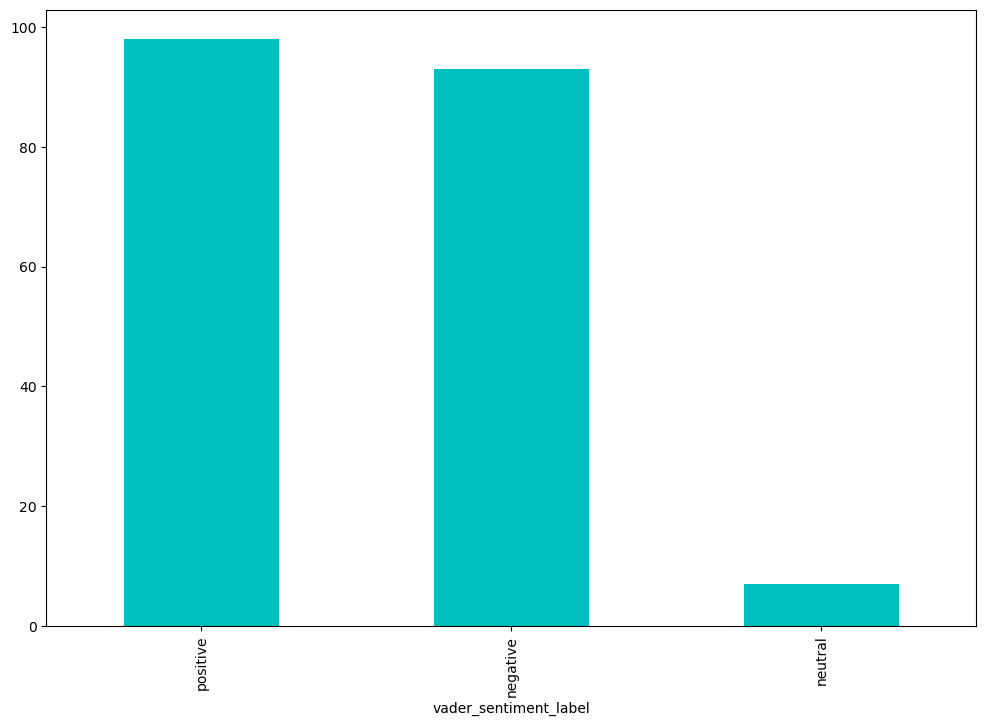

In [101]:
# Start by counting how many positive, negative and neutral sentiments

data['vader_sentiment_label'].value_counts().plot.bar(color=default_plot_color)

In [102]:
data['vader_sentiment_label'].value_counts()

vader_sentiment_label
positive    98
negative    93
neutral      7
Name: count, dtype: int64

In [103]:
# Result: we have a few more news article with positive sentiments than negative with a few neutrals

/var/folders/kh/lpp45f9x2tl4dnfssb8yd5c40000gn/T/ipykernel_59908/3047512700.py:3: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(


[Text(0.5, 1.0, 'Sentiment by News Type')]

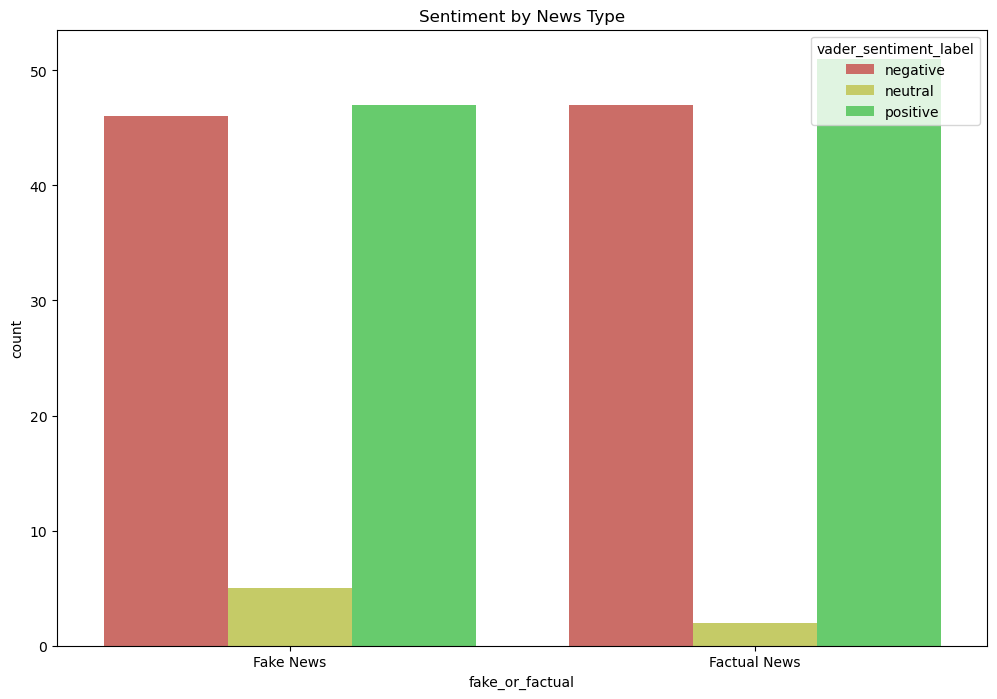

In [104]:
# Now we examin how this varies between the 2 types of news articles we have

sns.countplot(
    x = 'fake_or_factual',
    hue = 'vader_sentiment_label',
    palette = sns.color_palette('hls'),
    data = data
).set(title = 'Sentiment by News Type')


In [105]:
# Conclusion
# We can see there's a pretty even split between positive and negative sentiment and a few neutrals in
# there, but there isn't really a massive skew to one or the other in our factual news dataset.
# If you just look behind the legend, you can see that positive does skew more in this dataset.
# So we have a few more positive articles as opposed to negative in the factual news dataset.
# There's also a lot less neutrals in this.
# So the differences aren't drastic.
# So we cannot say at this moment that factual news skews more positive, and fake news is a little bit more evenly distributed.
# It would require a bit more of a deep dive.

## Topic Modeling

In [107]:
# What Topics Appear in Fake News
# We will use  Latent Dirichlet allocation

In [131]:
# Step 1 - Vectorizing Text

fake_news_text = data[data['fake_or_factual'] == "Fake News"]['text_clean'].reset_index(drop=True)


In [132]:
dictionary_fake = corpora.Dictionary(fake_news_text)


In [111]:
print(dictionary_fake)

Dictionary<5759 unique tokens: ['16yearold', 'actor', 'actress', 'aid', 'also']...>


In [133]:
# create bag of words
doc_term_fake = [dictionary_fake.doc2bow(text) for text in fake_news_text]


In [134]:
print(doc_term_fake[:2])

[[(0, 1), (1, 1), (2, 4), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 3), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

In [137]:
# Generate an empty list of coherent values and empty list for our models

coherence_values = []
model_list = []

min_topics = 2
max_topics = 11

# for loop to run over each of the iteration of this model
for num_topics_i in range(min_topics, max_topics+1):
    model = gensim.models.LdaModel(doc_term_fake, num_topics=num_topics_i, id2word = dictionary_fake)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=fake_news_text, dictionary=dictionary_fake, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

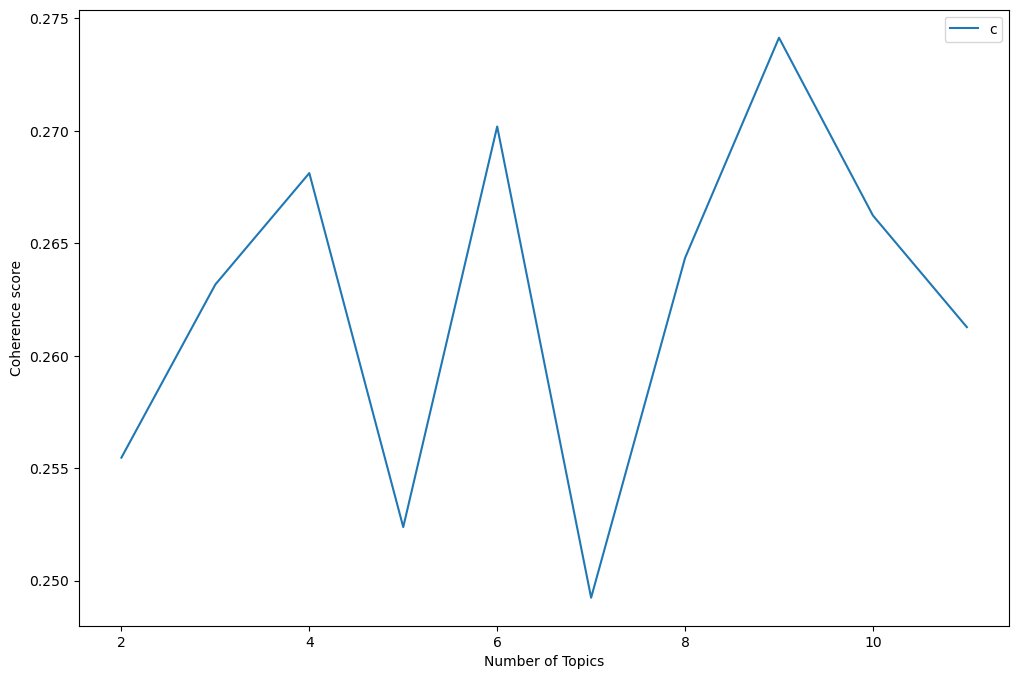

In [138]:
plt.plot(range(min_topics, max_topics+1), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [139]:
# create LDA Model with 7 topics

num_topics_lda = 7

lda_model = gensim.models.LdaModel(corpus=doc_term_fake, id2word=dictionary_fake, num_topics=num_topics_lda)

In [142]:
lda_model.print_topics(num_topics_lda, num_words=10) # 10 most common words for each of the topics

[(0,
  '0.015*"trump" + 0.007*"said" + 0.004*"year" + 0.004*"one" + 0.004*"time" + 0.004*"u" + 0.004*"president" + 0.003*"state" + 0.003*"would" + 0.003*"obama"'),
 (1,
  '0.008*"trump" + 0.005*"republican" + 0.005*"said" + 0.005*"president" + 0.004*"woman" + 0.004*"clinton" + 0.003*"state" + 0.003*"time" + 0.003*"would" + 0.003*"also"'),
 (2,
  '0.010*"trump" + 0.005*"clinton" + 0.005*"would" + 0.005*"said" + 0.004*"u" + 0.004*"time" + 0.003*"state" + 0.003*"president" + 0.003*"one" + 0.003*"email"'),
 (3,
  '0.013*"trump" + 0.004*"u" + 0.004*"people" + 0.004*"million" + 0.004*"food" + 0.004*"one" + 0.004*"would" + 0.003*"president" + 0.003*"republican" + 0.003*"stamp"'),
 (4,
  '0.013*"trump" + 0.006*"clinton" + 0.005*"president" + 0.005*"said" + 0.004*"state" + 0.004*"time" + 0.003*"would" + 0.003*"one" + 0.003*"image" + 0.003*"people"'),
 (5,
  '0.007*"trump" + 0.005*"said" + 0.004*"state" + 0.004*"year" + 0.004*"clinton" + 0.003*"republican" + 0.003*"one" + 0.003*"image" + 0.003*"